![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Modelowanie języka</h1>
<h2> 02. <i>Języki i ich prawa statystyczne</i>  [wykład]</h2> 
<h3> Filip Graliński (2022)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)



## Języki i ich prawa statystyczne



Jakim rozkładom statystycznym podlegają języki?



### Język naturalny albo „Pan Tadeusz” w liczbach



Przygotujmy najpierw „infrastrukturę” do *segmentacji* tekstu na różnego rodzaju jednostki.
Używać będziemy generatorów.

**Pytanie** Dlaczego generatory zamiast list?



In [1]:
import requests

url = 'https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt'
pan_tadeusz = requests.get(url).content.decode('utf-8')

pan_tadeusz[100:150]

Księga pierwsza



Gospodarstwo

Powrót pani

#### Znaki



In [1]:
from itertools import islice

def get_characters(t):
    yield from t

list(islice(get_characters(pan_tadeusz), 100, 150))

['K', 's', 'i', 'ę', 'g', 'a', ' ', 'p', 'i', 'e', 'r', 'w', 's', 'z', 'a', '\r', '\n', '\r', '\n', '\r', '\n', '\r', '\n', 'G', 'o', 's', 'p', 'o', 'd', 'a', 'r', 's', 't', 'w', 'o', '\r', '\n', '\r', '\n', 'P', 'o', 'w', 'r', 'ó', 't', ' ', 'p', 'a', 'n', 'i']

In [1]:
from collections import Counter

c = Counter(get_characters(pan_tadeusz))

c

Counter({' ': 63444, 'a': 30979, 'i': 29353, 'e': 25343, 'o': 23050, 'z': 22741, 'n': 15505, 'r': 15328, 's': 15255, 'w': 14625, 'c': 14153, 'y': 13732, 'k': 12362, 'd': 11465, '\r': 10851, '\n': 10851, 't': 10757, 'm': 10269, 'ł': 10059, ',': 9130, 'p': 8031, 'u': 7699, 'l': 6677, 'j': 6586, 'b': 5753, 'ę': 5534, 'ą': 4794, 'g': 4775, 'h': 3915, 'ż': 3334, 'ó': 3097, 'ś': 2524, '.': 2380, 'ć': 1956, ';': 1445, 'P': 1265, 'W': 1258, ':': 1152, '!': 1083, 'S': 1045, 'T': 971, 'I': 795, 'N': 793, 'Z': 785, 'J': 729, '—': 720, 'A': 698, 'K': 683, 'ń': 651, 'M': 585, 'B': 567, 'O': 567, 'C': 556, 'D': 552, '«': 540, '»': 538, 'R': 489, '?': 441, 'ź': 414, 'f': 386, 'G': 358, 'L': 316, 'H': 309, 'Ż': 219, 'U': 184, '…': 157, '*': 150, '(': 76, ')': 76, 'Ś': 71, 'F': 47, 'é': 43, '-': 33, 'Ł': 24, 'E': 23, '/': 19, 'Ó': 13, '8': 10, '9': 8, '2': 6, 'v': 5, 'Ź': 4, '1': 4, '3': 3, 'x': 3, 'V': 3, '7': 2, '4': 2, '5': 2, 'q': 2, 'æ': 2, 'à': 1, 'Ć': 1, '6': 1, '0': 1})

Napiszmy pomocniczą funkcję, która zwraca **listę frekwencyjną**.

Counter({' ': 63444, 'a': 30979, 'i': 29353, 'e': 25343, 'o': 23050, 'z': 22741, 'n': 15505, 'r': 15328, 's': 15255, 'w': 14625, 'c': 14153, 'y': 13732, 'k': 12362, 'd': 11465, '\r': 10851, '\n': 10851, 't': 10757, 'm': 10269, 'ł': 10059, ',': 9130, 'p': 8031, 'u': 7699, 'l': 6677, 'j': 6586, 'b': 5753, 'ę': 5534, 'ą': 4794, 'g': 4775, 'h': 3915, 'ż': 3334, 'ó': 3097, 'ś': 2524, '.': 2380, 'ć': 1956, ';': 1445, 'P': 1265, 'W': 1258, ':': 1152, '!': 1083, 'S': 1045, 'T': 971, 'I': 795, 'N': 793, 'Z': 785, 'J': 729, '—': 720, 'A': 698, 'K': 683, 'ń': 651, 'M': 585, 'B': 567, 'O': 567, 'C': 556, 'D': 552, '«': 540, '»': 538, 'R': 489, '?': 441, 'ź': 414, 'f': 386, 'G': 358, 'L': 316, 'H': 309, 'Ż': 219, 'U': 184, '…': 157, '\*': 150, '(': 76, ')': 76, 'Ś': 71, 'F': 47, 'é': 43, '-': 33, 'Ł': 24, 'E': 23, '/': 19, 'Ó': 13, '8': 10, '9': 8, '2': 6, 'v': 5, 'Ź': 4, '1': 4, '3': 3, 'x': 3, 'V': 3, '7': 2, '4': 2, '5': 2, 'q': 2, 'æ': 2, 'à': 1, 'Ć': 1, '6': 1, '0': 1})



In [1]:
from collections import Counter
from collections import OrderedDict

def freq_list(g, top=None):
  c = Counter(g)

  if top is None:
     items = c.items()
  else:
     items = c.most_common(top)

  return OrderedDict(sorted(items, key=lambda t: -t[1]))

freq_list(get_characters(pan_tadeusz), top=8)

OrderedDict([(' ', 63444), ('a', 30979), ('i', 29353), ('e', 25343), ('o', 23050), ('z', 22741), ('n', 15505), ('r', 15328)])

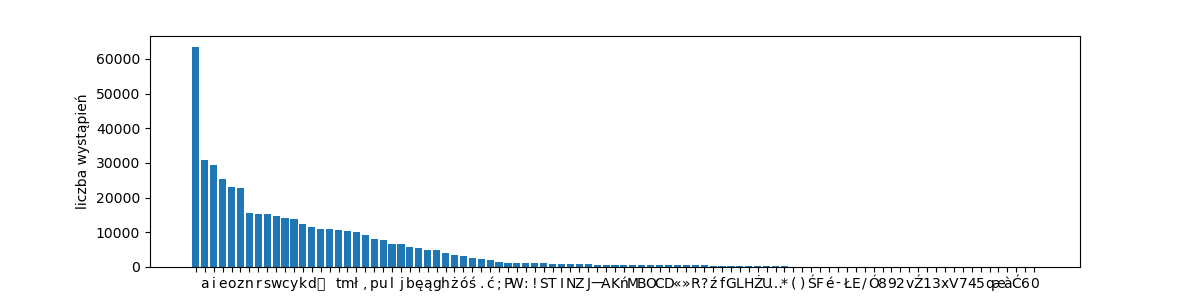

In [1]:
import matplotlib.pyplot as plt
from collections import OrderedDict

def rang_freq_with_labels(name, g, top=None):
   freq = freq_list(g, top)

   plt.figure(figsize=(12, 3))
   plt.ylabel('liczba wystąpień')

   plt.bar(freq.keys(), freq.values())

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_freq_with_labels('pt-chars', get_characters(pan_tadeusz))

#### Słowa



Co rozumiemy pod pojęciem słowa czy wyrazu, nie jest oczywiste. W praktyce zależy to od wyboru **tokenizatora**.

Załóżmy, że przez wyraz rozumieć będziemy nieprzerwany ciąg liter bądź cyfr (oraz gwiazdek
— to za chwilę ułatwi nam analizę pewnego tekstu…).



In [1]:
from itertools import islice
import regex as re

def get_words(t):
  for m in re.finditer(r'[\p{L}0-9\*]+', t):
     yield m.group(0)

list(islice(get_words(pan_tadeusz), 100, 130))

['Ty', 'co', 'gród', 'zamkowy', 'Nowogródzki', 'ochraniasz', 'z', 'jego', 'wiernym', 'ludem', 'Jak', 'mnie', 'dziecko', 'do', 'zdrowia', 'powróciłaś', 'cudem', 'Gdy', 'od', 'płaczącej', 'matki', 'pod', 'Twoją', 'opiekę', 'Ofiarowany', 'martwą', 'podniosłem', 'powiekę', 'I', 'zaraz']

Zobaczmy 20 najczęstszych wyrazów.



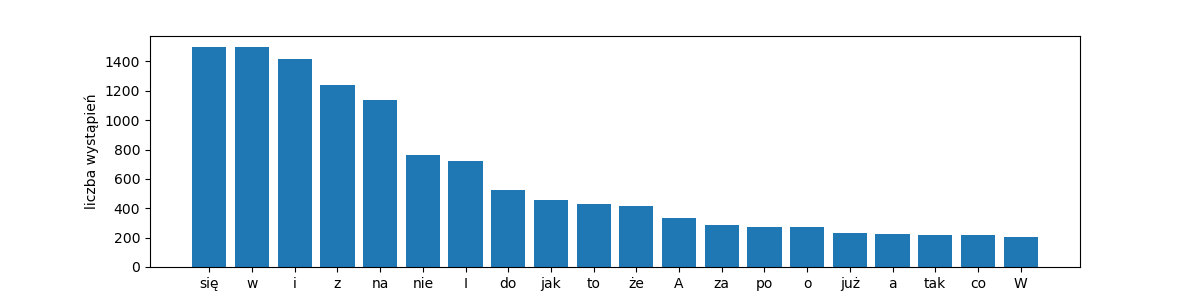

In [1]:
rang_freq_with_labels('pt-words-20', get_words(pan_tadeusz), top=20)

Zobaczmy pełny obraz, już bez etykiet.



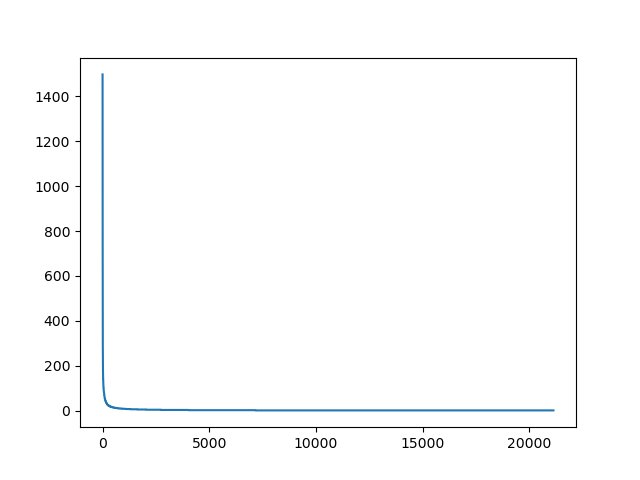

In [1]:
import matplotlib.pyplot as plt
from math import log

def rang_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot(range(1, len(freq.values())+1), freq.values())

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_freq('pt-words', get_words(pan_tadeusz))

Widać, jak różne skale obejmuje ten wykres. Zastosujemy logarytm,
najpierw tylko do współrzędnej $y$.



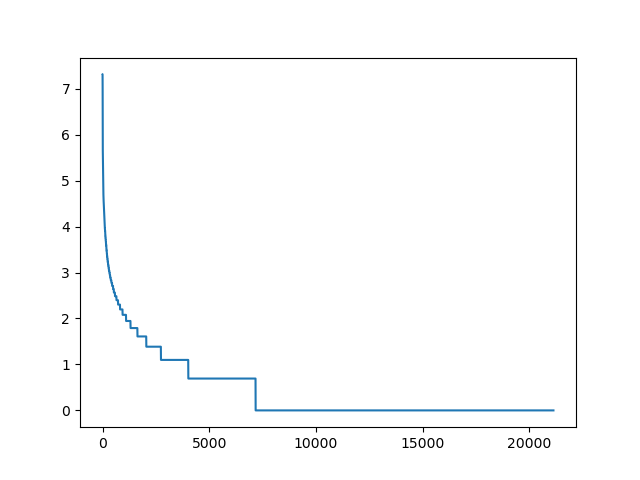

In [1]:
import matplotlib.pyplot as plt
from math import log

def rang_log_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot(range(1, len(freq.values())+1), [log(y) for y in freq.values()])

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

rang_log_freq('pt-words-log', get_words(pan_tadeusz))

****Pytanie**** Dlaczego widzimy coraz dłuższe „schodki”?



#### Hapax legomena



Z poprzedniego wykresu możemy odczytać, że ok. 2/3 wyrazów wystąpiło
dokładnie 1 raz. Słowa występujące jeden raz w danym korpusie noszą
nazwę *hapax legomena* (w liczbie pojedynczej *hapax legomenon*, ἅπαξ
λεγόμενον, „raz powiedziane”, żargonowo: „hapaks”).

„Prawdziwe” hapax legomena, słowa, które wystąpiły tylko raz w *całym*
korpusie tekstów danego języka (np. starożytnego) rzecz jasna
sprawiają olbrzymie trudności w tłumaczeniu. Przykładem jest greckie
słowo ἐπιούσιος, przydawka odnosząca się do chleba w modlitwie „Ojcze
nasz”. Jest to jedyne poświadczenie tego słowa w całym znanym korpusie
greki (nie tylko z Pisma Świętego). W języku polskim tłumaczymy je na
„powszedni”, ale na przykład w rosyjskim przyjął się odpowiednik
„насущный” — o przeciwstawnym do polskiego znaczeniu!

W sumie podobne problemy hapaksy mogą sprawiać metodom statystycznym
przy przetwarzaniu jakiekolwiek korpusu.



#### Wykres log-log



Jeśli wspomniany wcześniej wykres narysujemy używając skali
logarytmicznej dla ****obu**** osi, otrzymamy kształt zbliżony do linii prostej.

Tę własność tekstów nazywamy ****prawem Zipfa****.



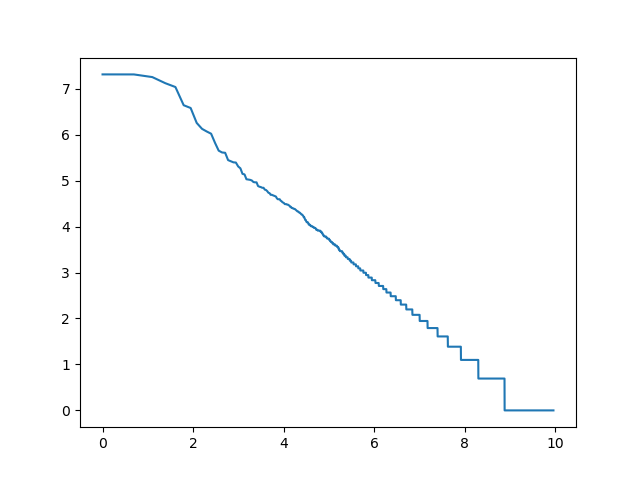

In [1]:
import matplotlib.pyplot as plt
from math import log

def log_rang_log_freq(name, g):
   freq = freq_list(g)

   plt.figure().clear()
   plt.plot([log(x) for x in range(1, len(freq.values())+1)], [log(y) for y in freq.values()])

   fname = f'02_Jezyki/{name}.png'

   plt.savefig(fname)

   return fname

log_rang_log_freq('pt-words-log-log', get_words(pan_tadeusz))

#### Związek między frekwencją a długością



Powiązane z prawem Zipfa prawo językowe opisuje zależność między
częstością użycia słowa a jego długością. Generalnie im krótsze słowo, tym częstsze.



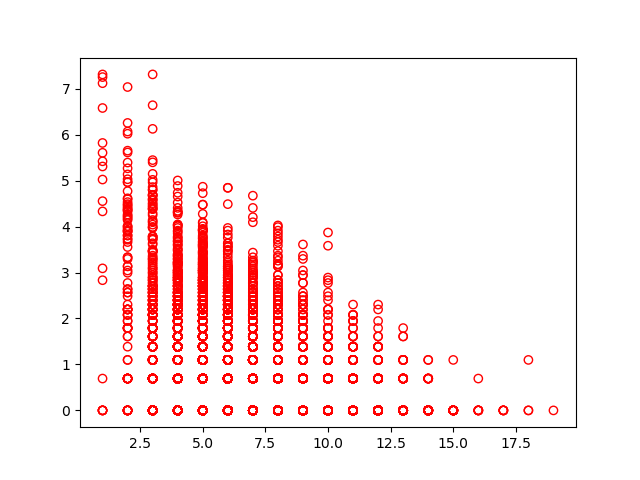

In [1]:
def freq_vs_length(name, g, top=None):
    freq = freq_list(g)

    plt.figure().clear()
    plt.scatter([len(x) for x in freq.keys()], [log(y) for y in freq.values()],
                facecolors='none', edgecolors='r')

    fname = f'02_Jezyki/{name}.png'

    plt.savefig(fname)

    return fname

freq_vs_length('pt-lengths', get_words(pan_tadeusz))